# Basic problem-independent evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Specify directory and data to analyse

In [3]:
data_dir = '../data/custom_heuristics/'
ackley_iter = pd.read_csv('../data/custom_heuristic/custom_ackley_10/iterations.csv')
ackley_iter
ackley_eval = pd.read_csv('../data/custom_heuristic/custom_ackley_10/evaluations.csv')
ackley_eval

,evaluation,current_fx,best_fx
0,1,20.6183,20.6183
1,2,20.3909,20.3909
2,52,20.1161,20.1161
3,68,19.8534,19.8534
4,12525,21.1518,19.8534
5,1,21.3832,21.3832
6,3,21.2989,21.2989
7,7,21.0484,21.0484
8,15,20.9185,20.9185
9,16,20.8436,20.8436


## Calculate statistics of runs

### for iterations

In [4]:
stats_iter = ackley_iter.groupby("iteration").agg(
    mean_opt=pd.NamedAgg(column="best_fx", aggfunc=np.mean),
    std_opt=pd.NamedAgg(column="best_fx", aggfunc=np.std),
    min_opt=pd.NamedAgg(column="best_fx", aggfunc="min"),
    max_opt=pd.NamedAgg(column="best_fx", aggfunc="max"),
    median_opt=pd.NamedAgg(column="best_fx", aggfunc=np.median),
)
pd.DataFrame(stats_iter)
stats_iter

,mean_opt,std_opt,min_opt,max_opt,median_opt
iteration,,,,,
1,19.93630,0.480233,19.2100,20.3909,19.9675
10,19.19486,0.697925,18.0349,19.8534,19.2787
20,19.19486,0.697925,18.0349,19.8534,19.2787
30,19.19486,0.697925,18.0349,19.8534,19.2787
40,19.19486,0.697925,18.0349,19.8534,19.2787
50,19.19486,0.697925,18.0349,19.8534,19.2787
60,19.19486,0.697925,18.0349,19.8534,19.2787
70,19.19486,0.697925,18.0349,19.8534,19.2787
80,19.19486,0.697925,18.0349,19.8534,19.2787


### for evaluations

In [85]:
# evaluations are logged on improvement, thus evaluation numbers differ for every run. 
# missing data needs to be filled first (with data from previous evaluation log) to properly calculate statistics

# gather all evaluation numbers
evals = sorted(ackley_eval["evaluation"].unique())
evals = pd.DataFrame(evals, columns=['evaluation'])

# split dataframe into several, one for each run
splits = [] 
start = 0
for i in ackley_eval.index:
    if (ackley_eval.at[i,"evaluation"] == ackley_eval["evaluation"].max()):
        splits.append(ackley_eval.iloc[start:i+1])
        start = i+1

# expand evaluation numbers for each run and fill missing data with those of previous evaluation
dfs = [j.merge(evals, on='evaluation', how='right') for j in splits]
df_filled = [k.fillna(method='ffill') for k in dfs]

# merge now completed dataframes once more
result_1 = pd.concat(df_filled)

# group best_fx for each evaluation number and calculate statistics
stats_eval = result_1.groupby(by="evaluation").agg(
    mean_opt=pd.NamedAgg(column="best_fx", aggfunc=np.mean),
    std_opt=pd.NamedAgg(column="best_fx", aggfunc=np.std),
    min_opt=pd.NamedAgg(column="best_fx", aggfunc="min"),
    max_opt=pd.NamedAgg(column="best_fx", aggfunc="max"),
    median_opt=pd.NamedAgg(column="best_fx", aggfunc=np.median),
)
pd.DataFrame(stats_eval)
stats_eval


,mean_opt,std_opt,min_opt,max_opt,median_opt
evaluation,,,,,
1,21.01192,0.550520,20.2396,21.4696,21.3489
2,20.73960,0.467717,20.2396,21.3832,20.6575
3,20.66006,0.406264,20.2396,21.2989,20.6575
4,20.65272,0.405390,20.2396,21.2989,20.6575
5,20.54294,0.472533,20.1086,21.2989,20.3909
7,20.42212,0.366588,20.1086,21.0484,20.3380
15,20.39614,0.311584,20.1086,20.9185,20.3380
16,20.38116,0.280436,20.1086,20.8436,20.3380
17,20.33508,0.213035,20.1086,20.6567,20.3380


## Plotting

### Iterations

<AxesSubplot:xlabel='iteration'>

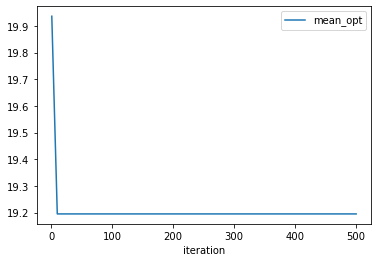

In [81]:
stats_iter.plot(y="mean_opt")

### Evaluations

<AxesSubplot:xlabel='evaluation'>

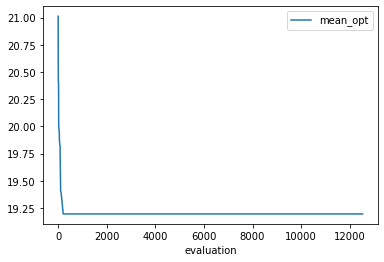

In [83]:
stats_eval.plot(y="mean_opt")